In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df = pd.read_csv('2D.csv', skiprows=1, sep=';', names=['X1','X2', 'Class'], decimal=',')
df['X0'] = np.ones(len(df))
df.head()

,X1,X2,Class,X0
0,-0.036819,-0.885263,0,1.0
1,-0.576998,-0.367745,1,1.0
2,0.397497,-0.418429,0,1.0
3,-0.288463,0.801790,1,1.0
4,0.829187,-0.350243,0,1.0


In [3]:
X = df[['X0','X1','X2']].values
d = df['Class'].values
print(X.shape, d.shape)

(500, 3) (500,)


Podział danych:

In [4]:
temp = np.arange(0,X.shape[0],1)
np.random.shuffle(temp)
X_train = X[temp[:350]]
d_train = d[temp[:350]]
X_test = X[temp[350:]]
d_test = d[temp[350:]]

Perceptron:

In [5]:
def perceptron(x, w):
    u = np.dot(x, w)
    y = 1 if u>0 else 0
    return y

Uczenie:

<IPython.core.display.Javascript object>


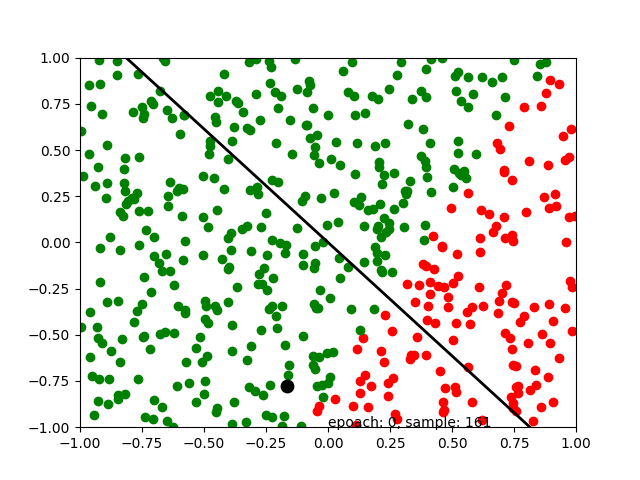

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from time import time

epoach = 100
eta = 0.01
bias = 0

iteration = epoach*X.shape[0]

wagi = np.random.random(X.shape[1]) 
if bias == 0:
    wagi[0]=0
a = -wagi[1]/wagi[2]
b = -wagi[0]/wagi[2]

xx = np.linspace(-1 ,1 ,100)
yy = a*xx+b
X0 = np.array([X[i] for i in range(len(X)) if d[i]==0])
X1 = np.array([X[i] for i in range(len(X)) if d[i]==1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.scatter(X0[:,1], X0[:,2], color='r')
ax.scatter(X1[:,1], X1[:,2], color='g')
ax.plot(xx,yy, lw=2, c='k')

def check(x, w, d):
    y = perceptron(x, w)
    if y == d:
        return True
    return False

ii = 0

def animate(i):
    global ii
    global wagi
    flag=False
    x = X[ii,:].copy()
    o = d[ii]
    while check(x, wagi, o):
        ii += 1 
        ii = ii % X.shape[0]
        x = X[ii,:].copy()
        o = d[ii]
        
    e, p = divmod(ii,X.shape[0])
    y = perceptron(X[p,:], wagi)
    if y==1 and d[p]==0:
        flag = True
        wagi -= eta*X[p,:]
    if y==0 and d[p]==1:
        flag = True
        wagi += eta*X[p,:]
    if bias == 0:
        wagi[0]=0
    if flag:
        a = -wagi[1]/wagi[2]
        b = -wagi[0]/wagi[2]
        yy = a*xx+b
        ax.clear()
        ax.scatter(X0[:,1], X0[:,2], color='r')
        ax.scatter(X1[:,1], X1[:,2], color='g')
        ax.scatter(X[p,1], X[p,2], color='k', s=80)
        ax.plot(xx,yy, lw=2, c='k')
        ax.text(0.0, -1.0, 'epoach: {0}, sample: {1}'.format(e,p))
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
    ii += 1
    ii = ii % X.shape[0]
    return ax,

dt = 1./30
t0 = time()
animate(0)
t1 = time()
interval = 100 * dt - (t1 - t0)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

anim = animation.FuncAnimation(fig, animate, frames=iteration, interval=interval)
#anim = animation.FuncAnimation(fig, animate, frames=250 ,interval=interval, blit=True)
#anim.save('animation_perc2.mp4', writer=writer)
plt.show()